In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Santiago Silva

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [23]:
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación, f es la funcion a derivar, x es el punto donde vamos a derivar, tol, la toleracia del error abs
'''
h = 0.1  # h inicial
    h_valores = []
    derivadas = []

    while h > tol:

        df = (f(x + h) - f(x - h)) / (2 * h)  #formulita diferencia central
        derivadas.append(df)
        h_valores.append(h)

        h /= 2  #reducimos h para siguiente paso

    valor_derivada = derivadas[-1]  #tomamos la última aproximación como el valor mas exacto
    return valor_derivada, h_valores

IndentationError: expected an indented block after function definition on line 1 (ipython-input-23-2700411191.py, line 2)

In [40]:
def derivada(f, x, tol=1e-8):

    h = 0.1  # h inicial
    h_valores = []
    derivadas = []

    while h > tol:

        df = (f(x + h) - f(x - h)) / (2 * h)  #formulita diferencia central
        derivadas.append(df)
        h_valores.append(h)

        h /= 2  #reducimos h para siguiente paso

    valor_derivada = derivadas[-1]  #tomamos la última aproximación como el valor mas exacto
    return valor_derivada, h_valores

In [41]:
f = lambda x: 3**x
df = lambda x: (3**x) * np.log(3)
x = 2
df_f, h_valores = derivada(f, x, tol=1e-8) #calculamos aproximaciones
print(df_f)

9.887510687112808


In [43]:
errores = [abs(df - df_f) for df in df_f] #calculo errores
plt.loglog(h_valores, errores)
plt.loglog(h_valores, [h**2 for h in h_valores])

plt.show()

TypeError: 'float' object is not iterable

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [24]:
r = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
v = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00])

pol_lagrange = lagrange(r, v)
print(pol_lagrange)

            5             4            3     2
-2.132e-13 x + 3.979e-13 x - 1.99e-13 x - 2 x - 2.398e-14 x + 2


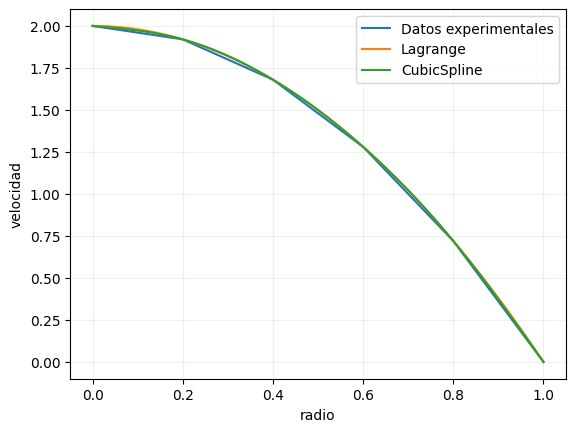

In [28]:
cs = CubicSpline(r, v, bc_type='natural')
r_eval = np.linspace(0, 1, 1000) # puntos a evaluar
#graficamos

plt.plot(r, v, label = 'Datos experimentales')
plt.plot(r_eval, pol_lagrange(r_eval), label = 'Lagrange')
plt.plot(r_eval, cs(r_eval), label = 'CubicSpline')
plt.xlabel('radio')
plt.ylabel('velocidad')
plt.legend()
plt.grid(True, alpha = 0.2)
plt.show()

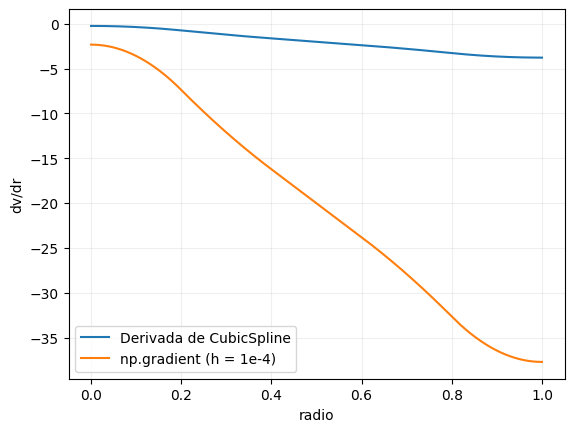

In [31]:
#derivamos usando cs

dv_dr = cs.derivative()(r_eval)
h = 1e-4
dv_dr_np = np.gradient(cs(r_eval), h)

#grafica

plt.plot(r_eval, dv_dr, label = 'Derivada de CubicSpline')
plt.plot(r_eval, dv_dr_np, label='np.gradient (h = 1e-4)')
plt.xlabel('radio')
plt.ylabel('dv/dr')
plt.legend()
plt.grid(True, alpha = 0.2)
plt.show()

/tmp/ipython-input-32-1714986790.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


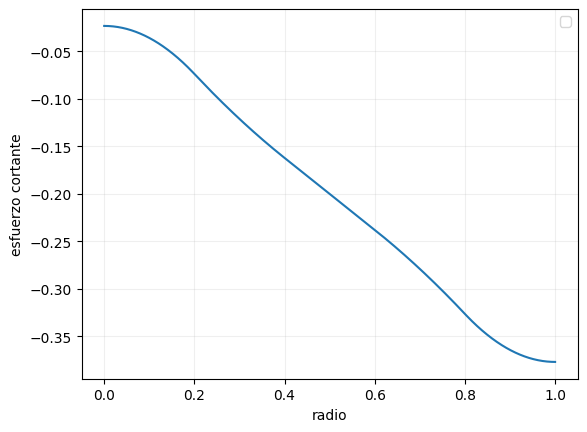

In [32]:
mu = 0.001

dv_dr_SI = dv_dr * 100 #conversion a s**-1
tau = mu * dv_dr_SI

plt.plot(r_eval, tau)
plt.xlabel('radio')
plt.ylabel('esfuerzo cortante')
plt.legend()
plt.grid(True, alpha = 0.2)
plt.show()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





Calculamos la masa del sólido, inicialmente con quad

In [13]:
def integral_z(y, x): #la primer integral en zdz, para par (y, x). El orden es dzdydx
  integrando = lambda z: x * y * z
  res, _ = quad(integrando, 0, 1 - x - y)
  return res

def integral_y(x): #integral para ydy
  integrando = lambda y: integral_z(y, x)
  res, _ = quad(integrando, 0, 1 - x)
  return res

def integral_x(): #ultima integral, para xdx
  integrando = lambda x: integral_y(x)
  res, _ = quad(integrando, 0, 1)
  return res

integral = integral_x()
print(integral)


0.001388888888888889


Ahora, calculamos la masa con tplquad

In [8]:
f = lambda z, y, x: x * y * z #la funcion en orden z, y, x, pues integra dzdydx

a, b = 0, 1 #limites de x, desde 0, hasta 1
g, h = lambda x: 0, lambda x: 1 - x #limites de  y, desde 0, hasta 1 - x
r, q = lambda x, y: 0, lambda x, y: 1 - x - y #limites de z, desde 0, hasta 1 - x - y

tplquad(f, a, b, g, h, r, q) #obtenemos valor y error de la integral

(0.001388888888888889, 8.555839940243213e-17)

B. momento de inercia para Iz, f = (x**2 + y**2) * (x * y * z)

In [9]:
f = lambda z, y, x: (x**2 + y**2) * (x * y * z) #

a, b = 0, 1
g, h = lambda x: 0, lambda x: 1 - x
r, q = lambda x, y: 0, lambda x, y: 1 - x - y

tplquad(f, a, b, g, h, r, q)

(0.00029761904761904765, 1.5209675643109918e-17)

momento de inercia para Ix, f = (y**2 + z**2) * (x * y * z)

In [11]:
f = lambda z, y, x: (y**2 + z**2) * (x * y * z)

a, b = 0, 1
g, h = lambda x: 0, lambda x: 1 - x
r, q = lambda x, y: 0, lambda x, y: 1 - x - y

tplquad(f, a, b, g, h, r, q)

(0.00029761904761904765, 1.8329816156081302e-17)